## Лабораторная работа 4.3.6
# Саморепродукция

In [1]:
import numpy as np
import scipy as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## А. Исследование двумерных решеток

### Определение периода решеток по их пространственному спектру

Для каждой сетки определим расстояние x между соседними дифракционными максимумами на экране:

In [4]:
data = pd.read_excel('lab-436.xlsx', 'table1')
data.head(len(data))

,№,"X, мм",m,"X/m, мм"
0,1,163,6,27.166667
1,2,108,6,18.000000
2,3,45,5,9.000000
3,4,22,5,4.400000
4,5,14,4,3.500000


Расстояние от касеты до экрана – L, длина волны лазера – $\lambda$.

In [22]:
# в мм:
L = 10**(3)
Lambda = 532 * 10**(-6)

Используем формулу $d = \dfrac{\lambda L}{x}$, где $x$ – расстояние между соседними максимумами.

In [38]:
d_method1 = list()
for i in range(len(data)):
  d_method1.append(L * Lambda / data.values[i, 3])
  print(i, ' | ', "%.3f" % d_method1[i], 'мм')

0  |  0.020 мм
1  |  0.030 мм
2  |  0.059 мм
3  |  0.121 мм
4  |  0.152 мм


### Определение периода решеток по изображению, увеличенному с помощью линзы

Определим размеры клеток, полученных с помощью линзы, на экране (рассматриваем геометрическое
изображение решётки) ($D$). Расстояние от линзы до сетки $a$, от линзы до экрана $b$, тогда период сетки
считается по формуле $d = D \dfrac{a}{b}$.

### Исследование эффекта саморепродукции с помощью сеток

Получим на экране геометрическое изображение сетки. Перемещая линзу с помощью микровинта, определим координаты $z_n$ плоскостей саморепродукции, соответствующих четкому изображению сетки на экране.

In [71]:
data2 = pd.read_excel('lab-436.xlsx', 'table2')
data2.head(len(data))

,z_0,z_1,z_2,z_3,z_4,z_5,z_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58.0,52.0,50.0,48.0,46.0,44.0,42.0
2,58.0,50.0,44.0,37.0,29.0,19.0,NaN
3,58.0,45.0,38.0,17.0,NaN,NaN,NaN
4,58.0,35.0,8.0,NaN,NaN,NaN,NaN


Построим график $z_n = f(n)$, по коэффициенту наклона графика $k$ определим период решетки: $d = \sqrt{\dfrac{k\lambda}{2}}$.

In [161]:
y = []
x = []
for i in range(5):
    y.append(data2.values[i, :])
    x.append(range(0, 7))
    
print(y)

k = [0 for i in range(5)]
b = [0 for i in range(5)]

for i in range(5):
    k[i], b[i] = np.polyfit(x[i], y[i], deg=1)

[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]), array([ 58.,  52.,  50.,  48.,  46.,  44.,  42.]), array([ 58.,  50.,  44.,  37.,  29.,  19.,  nan]), array([ 58.,  45.,  38.,  17.,  nan,  nan,  nan]), array([ 58.,  35.,   8.,  nan,  nan,  nan,  nan])]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


TypeError: 'int' object is not subscriptable

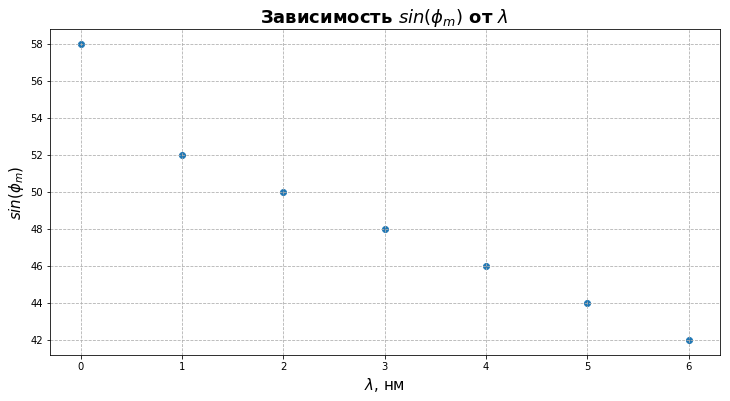

In [177]:
plt.figure(figsize=(12, 6))
plt.grid(linestyle='--')

plt.title('Зависимость $sin(\phi_m)$ от $\lambda$', fontweight='bold', fontsize=18)
plt.ylabel('$sin(\phi_m)$', fontsize=15)
plt.xlabel('$\lambda$, нм', fontsize=15)

i = 1

plt.scatter(x[i], y[i])

plt.plot(x[i], k[i] * x[i] + b[i])

#plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='o')

plt.xlim((400, 650))
plt.ylim((-0.07, 0.07))

plt.legend()
plt.show()

# Б.  Исследование решеток миры

Перемещая линзу с помощью микрометрического винта, определим по нониусной шкале координату плоскости, соответствующей изображению миры на экране по законам геометрической оптики, и координаты плоскостей саморепродукции.

In [162]:
data3 = pd.read_excel('lab-436.xlsx', 'table3')
data3.head(len(data))

,z_n (№25),z_n (№20)
0,78,78
1,60,73
2,46,56


In [163]:
d_25 = 12/18 # для миры №25
d_20 = 16/14 # для миры №20

In [164]:
a = 53  # (мм) от линзы до миры
b = 165 # (мм) от линзы до экрана